In [84]:
#we import the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import LogLocator

Exercise 6.11

1)

In [85]:
#we write the easy code to implement the relaxation method to solve the non linear equation x = 1-exp(-2x)
x = 1
for i in range(10):
    x = 1-np.exp(-2*x)
    print(f"Iteration: {i} Solution: {x}")

Iteration: 0 Solution: 0.8646647167633873
Iteration: 1 Solution: 0.8225966691808597
Iteration: 2 Solution: 0.8070247503317746
Iteration: 3 Solution: 0.8009201942366403
Iteration: 4 Solution: 0.7984747083247583
Iteration: 5 Solution: 0.7974866394625985
Iteration: 6 Solution: 0.797086049491047
Iteration: 7 Solution: 0.796923413762181
Iteration: 8 Solution: 0.7968573480008734
Iteration: 9 Solution: 0.7968305046795713


In [86]:
#now we figure out which should be the number of iterations in order to get convergence to a solution accurate to 10^(-6)
#in our case f(x) = 1-e^(-2x), then f'(x) = 2e^(-2x) 
def error_relaxation(iteration, f, f_prime, x, tol):
    for i in range(iteration):  # we go for a maximum number of iterations
        x_new = f(x)
        epsilon = abs(x_new - x)/(1-1/f_prime(x))
        print(f"Iteration {i+1}: x = {x_new:.8f}, Error = {abs(epsilon):.2e}")
        if abs(epsilon) < tol:
            print(f"Accuracy better than 1e-6 obtained in {i+1} iterations.")
            break
        x = x_new
    else:
        print("\n No convergence within the max iterations choosen")

In [87]:
f = lambda x: 1 - np.exp(-2 * x)
f_prime = lambda x: 2*np.exp(-2 * x)

x = 1 #starting point
tol = 1e-6 #tollerance
max_itearation = 100000 #max number of iteration

epsilon = error_relaxation(max_itearation, f, f_prime, x, tol)

Iteration 1: x = 0.86466472, Error = 5.02e-02
Iteration 2: x = 0.82259667, Error = 2.31e-02
Iteration 3: x = 0.80702475, Error = 9.79e-03
Iteration 4: x = 0.80092019, Error = 4.04e-03
Iteration 5: x = 0.79847471, Error = 1.65e-03
Iteration 6: x = 0.79748664, Error = 6.73e-04
Iteration 7: x = 0.79708605, Error = 2.74e-04
Iteration 8: x = 0.79692341, Error = 1.11e-04
Iteration 9: x = 0.79685735, Error = 4.52e-05
Iteration 10: x = 0.79683050, Error = 1.84e-05
Iteration 11: x = 0.79681960, Error = 7.47e-06
Iteration 12: x = 0.79681516, Error = 3.03e-06
Iteration 13: x = 0.79681336, Error = 1.23e-06
Iteration 14: x = 0.79681263, Error = 5.01e-07
Accuracy better than 1e-6 obtained in 14 iterations.


2)

In [88]:
#we now write the overelaxation method, just to see how it works
f = lambda x: 1 - np.exp(-2 * x)

x = 1
omega = 0.5

for i in range(10):
    x = (1 + omega)*f(x) - omega * x
    print(f"Iteration: {i+1} Solution: {x}")

#we should find exactly the same result of before

Iteration: 1 Solution: 0.796997075145081
Iteration: 2 Solution: 0.7968323724281932
Iteration: 3 Solution: 0.7968143476015649
Iteration: 4 Solution: 0.7968123729832619
Iteration: 5 Solution: 0.7968121566399141
Iteration: 6 Solution: 0.7968121329365914
Iteration: 7 Solution: 0.79681213033957
Iteration: 8 Solution: 0.796812130055031
Iteration: 9 Solution: 0.7968121300238561
Iteration: 10 Solution: 0.7968121300204403


In [89]:
#function that we well use to find the number of iterations needed to get convergence with overelaxation method (within out accurqacy goal)

def error_overelaxation(iteration, f, f_prime, x, tol):
    for i in range(iteration):  # we go for a maximum number of iterations
        x_new = f(x)
        epsilon = abs(x_new - x)/(1-1/((1 + omega) * f_prime(x) - omega))
        print(f"Iteration {i+1}: x = {x_new:.8f}, Error = {abs(epsilon):.2e}")
        if abs(epsilon) < tol:
            print(f"Accuracy better than 1e-6 obtained in {i+1} iterations.")
            break
        x = x_new
    else:
        print("No convergence within the max iterations choosen")

In [90]:
f = lambda x: 1 - np.exp(-2 * x)
f_prime = lambda x: 2*np.exp(-2 * x)

x = 1 #starting point
tol = 1e-6 #tollerance
omega = 0.68 #overelaxation parameter
max_itearation = 100000 #max number of iteration

epsilon = error_overelaxation(max_itearation, f, f_prime, x, tol)

Iteration 1: x = 0.86466472, Error = 2.49e-02
Iteration 2: x = 0.82259667, Error = 3.26e-03
Iteration 3: x = 0.80702475, Error = 4.77e-04
Iteration 4: x = 0.80092019, Error = 6.70e-05
Iteration 5: x = 0.79847471, Error = 7.01e-06
Iteration 6: x = 0.79748664, Error = 4.40e-07
Accuracy better than 1e-6 obtained in 6 iterations.


Exercise 6.13: Wien's displacement constant

In [91]:
tol = 1e-6

f = lambda x: 5 * np.exp(-x) + x -5

#we choose two initial point x1 and x2

x1 = -1
x2 = 2

for i in range(100):
    if abs(x1-x2)>tol:
        if f(x1)*f(x2)<0: #we start with the algoritm only if the two functions have opposite sign uin the point choosen 
            x_prime = (x1 + x2)/2
            #print(x_prime)
            if f(x_prime)*f(x1)>0: #sign numpy function give us +1 if the number is bigger than zero and give us -1 if the number is smaller than zero
                x1 = x_prime
            else: 
                x2 = x_prime
        else: 
            if f(x1)*f(x2)>0:
                print(f"Choose two different initial points since f(x1)*f(x2) > 0: {f(x1)*f(x2)}")
            if f(x1)==0:
                print(f"You found a root")
                print(x1, f(x1))
            if f(x2)==0:
                print(f"You found a root")
                print(x2, f(x2))
            break
    else:
        x_root = (x1 + x2)/2
        print(f"x_root = {x_root} \nf(x_root) = {f(x_root)}")
        break #we stop the loop as soon as the |x1-x2|<1e-6 

x_root = 1.1920928955078125e-07 
f(x_root) = -4.768371226759882e-07


In [92]:
#here we found the second root of the function (actually the first one is 0 and it has not physical meaning in our case)

tol = 1e-6
f = lambda x: 5 * np.exp(-x) + x - 5

# initial guess
x1 = 2
x2 = 5

#check for the sign 
if f(x1) * f(x2) > 0:
    print("Error: f(x1) * f(x2) > 0")
else:
    for i in range(100):
        x_mid = (x1 + x2) / 2
        f_mid = f(x_mid)
        #print(f_mid)

        #we stop if we reach the desired tolerance
        if abs(x2 - x1) < tol:
            print(f"Convergence in {i+1} iterations.")
            print(f"x = {x_mid:.10f}, f(x) = {f_mid:.2e}")
            break

        if f(x1) * f_mid < 0:
            x2 = x_mid
        else:
            x1 = x_mid
        if f(x1)==0:
                print(f"You found a root")
                print(x1, f(x1))
                break
        if f(x2)==0:
                print(f"You found a root")
                print(x2, f(x2))
                break
    else:
        print("Max iterations reached without convergence.")


Convergence in 23 iterations.
x = 4.9651144743, f(x) = 2.34e-07


In [93]:
#computation of the value of the Wien displacement constant
xsol = x_mid
# Fundamental constants
h = 6.626e-34      # Planck constant in J·s
c = 2.998e8        # Speed of light in m/s
kB = 1.381e-23     # Boltzmann constant in J/K

b = h*c/(kB*xsol)
print(f"Wien displacement constant b = {b} m·K")

Wien displacement constant b = 0.0028970775156584583 m·K


In [94]:
#we now find the temperature of the sun given that the wavelength at which the emission is maximum is 502 nm
lambda_max = 502e-9 #in meter
T = b/lambda_max
print(f"Temperature of the sun T = {T} K")

Temperature of the sun T = 5771.070748323622 K


Exercise 3: Gradient Descent and Fitting 

In [95]:
#gradient descent function
def gradient_descent_method(x,y,gamma,h,tolerance,f):
    i=0
    # saving value
    x_vals = [x]
    y_vals = [y]

    dfdx = (f(x, y) - f(x - h, y)) / h
    dfdy = (f(x, y) - f(x, y - h)) / h

    x1 = x - gamma * dfdx
    y1 = y - gamma * dfdy

    x_vals.append(x1)
    y_vals.append(y1)


    # Gradient descent with backward derivative
    while abs(x1 - x) > tolerance and abs(y1 - y) > tolerance:
        dfdx = (f(x1, y) - f(x, y)) / (x1-x)
        dfdy = (f(x, y1) - f(x, y)) / (y1-y)

        x2 = x1 - gamma * dfdx
        y2 = y1 - gamma * dfdy

        x,y = x1, y1
        x1,y1 = x2,y2

        x_vals.append(x1)
        y_vals.append(y1)

        i = i+1

        if abs(x1 - x) < tolerance and abs(y1 - y) < tolerance:
            print(f"Convergence in {i+1} itrations.")
            break

        print(f"Iteration {i+1}: x = {x1:.6f}, y = {y1:.6f}")

    print(f"\n Minimum is in: ({x1:.6f}, {y1:.6f})")

    return x_vals,y_vals


In [96]:
#toy function
f = lambda x, y: (x - 2)**2 + (y - 2)**2

# Initial values
x = 1.0
y = 1.0
gamma = 0.1
h = 1e-2
tolerance = 1e-6
x_value =[]
y_values = []

x_value, y_values = gradient_descent_method(x,y,gamma,h,tolerance,f)

Iteration 2: x = 1.380900, y = 1.380900
Iteration 3: x = 1.522710, y = 1.522710
Iteration 4: x = 1.632349, y = 1.632349
Iteration 5: x = 1.716843, y = 1.716843
Iteration 6: x = 1.781924, y = 1.781924
Iteration 7: x = 1.832047, y = 1.832047
Iteration 8: x = 1.870650, y = 1.870650
Iteration 9: x = 1.900380, y = 1.900380
Iteration 10: x = 1.923277, y = 1.923277
Iteration 11: x = 1.940912, y = 1.940912
Iteration 12: x = 1.954493, y = 1.954493
Iteration 13: x = 1.964952, y = 1.964952
Iteration 14: x = 1.973008, y = 1.973008
Iteration 15: x = 1.979212, y = 1.979212
Iteration 16: x = 1.983990, y = 1.983990
Iteration 17: x = 1.987670, y = 1.987670
Iteration 18: x = 1.990504, y = 1.990504
Iteration 19: x = 1.992686, y = 1.992686
Iteration 20: x = 1.994367, y = 1.994367
Iteration 21: x = 1.995662, y = 1.995662
Iteration 22: x = 1.996659, y = 1.996659
Iteration 23: x = 1.997427, y = 1.997427
Iteration 24: x = 1.998018, y = 1.998018
Iteration 25: x = 1.998474, y = 1.998474
Iteration 26: x = 1.9988

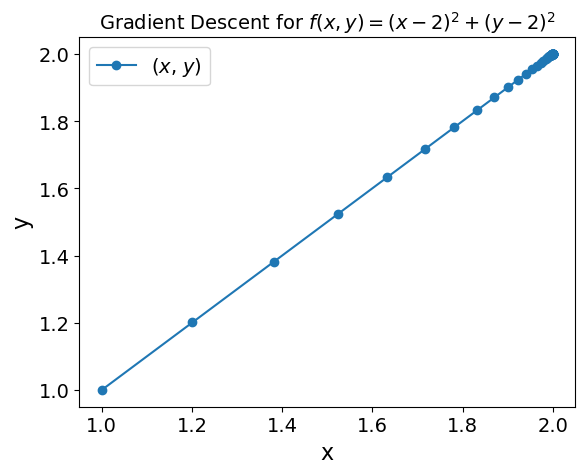

In [97]:
#plot to prove that our gradient descent method work
plt.plot(x_value, y_values, marker='o', label = "($x$, $y$)")

#Axis labels in English with custom font
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

#Title
plt.title(r'Gradient Descent for $f(x,y) = (x-2)^2 + (y-2)^2$', fontsize=14)

#Enlarge axis numbers (ticks)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)
plt.show()


3. Schechter” function

In [98]:
import pandas as pd

data = np.loadtxt("smf_cosmos.dat")
print("Shape of data:", data.shape)

df = pd.DataFrame(data, columns=["logMgal", "n", "errorlog"])

print(df)

Shape of data: (12, 3)
    logMgal         n  errorlog
0       9.6  0.006871  0.000734
1       9.8  0.005688  0.000655
2      10.0  0.005491  0.000582
3      10.2  0.004989  0.000568
4      10.4  0.004780  0.000548
5      10.6  0.004230  0.000565
6      10.8  0.003651  0.000494
7      11.0  0.002253  0.000371
8      11.2  0.001117  0.000208
9      11.4  0.000418  0.000095
10     11.6  0.000084  0.000037
11     11.8  0.000012  0.000011


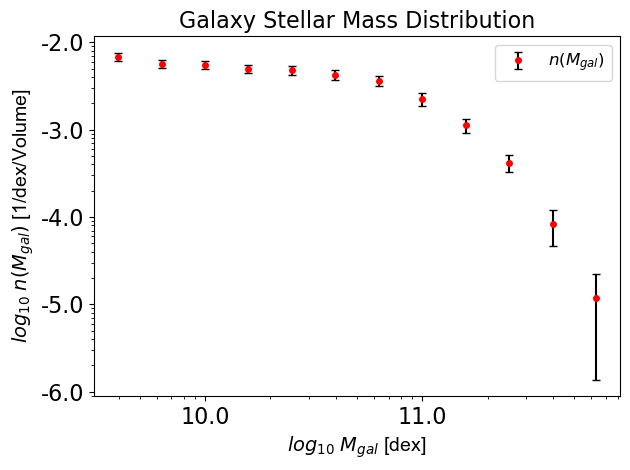

In [99]:
logMgal = data[:, 0]
n = data[:, 1]
errorlog = data[:, 2]

# Plot with error bars
plt.errorbar(10**logMgal, n, yerr=errorlog, fmt='o', markersize=4, color='red',
             capsize=3, label=r"$n(M_{gal})$", ecolor='black', linestyle='None')

# Set logarithmic scales on axes
plt.xscale("log")
plt.yscale("log")

# Axis labels and title
plt.xlabel(r"$log_{10}$ $M_{gal}$ [dex]", fontsize=14, fontname="Arial")
plt.ylabel(r"$log_{10}$ $n(M_{gal})$ [1/dex/Volume]", fontsize=14, fontname="Arial")
plt.title("Galaxy Stellar Mass Distribution", fontsize=16)

# Custom formatter for axis tick labels
formatter = FuncFormatter(lambda val, _: f"{np.log10(val):.1f}")

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Logarithmic locator for axes
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

# Tick parameters
plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [100]:
#gradient descent function
def gradient_descent_method3D(x,y,z,gamma,h,tolerance,f):
    i=0
    # saving value
    x_vals = [x]
    y_vals = [y]
    z_vals = [z]

    f_values = []

    dfdx = (f(x, y, z) - f(x - h, y, z)) / h
    dfdy = (f(x, y, z) - f(x, y - h, z)) / h
    dfdz = (f(x, y, z) - f(x, y, z-h)) / h

    x1 = x - gamma * dfdx
    y1 = y - gamma * dfdy
    z1 = z - gamma * dfdz

    x_vals.append(x1)
    y_vals.append(y1)
    z_vals.append(z1)


    # Gradient descent with backward descent
    while abs(x1 - x) > tolerance and abs(y1 - y) > tolerance and abs(z1 - z) > tolerance:
        dfdx = (f(x1, y, z) - f(x, y, z)) / (x1 - x) 
        dfdy = (f(x, y1, z) - f(x, y, z)) / (y1 - y)
        dfdz = (f(x, y, z1) - f(x, y, z)) / (z1 - z)

        #print(f(x1, y, z) - f(x, y, z))
        #print(x1)
        #print(dfdx, dfdy, dfdz)

        x2 = x1 - gamma * dfdx
        y2 = y1 - gamma * dfdy
        z2 = z1 - gamma * dfdz

        x,y,z = x1, y1,z1
        x1,y1,z1 = x2,y2,z2

        x_vals.append(x1)
        y_vals.append(y1)
        z_vals.append(z1)

        f_values.append(f(x,y,z))

        i = i+1

        if abs(x1 - x) < tolerance and abs(y1 - y) < tolerance and abs(z1 - z) < tolerance:
            print(f"Convergenza raggiunta in {i+1} iterazioni.")
            break

        print(f"Iter {i+1}: x = {x1:.6f}, y = {y1:.6f}, z = {z1:.6f}")

    print(f"\n Minimum is in: ({x1:.6f}, {y1:.6f}, {z1:.6f})")

    return x_vals,y_vals, z_vals, f_values


In [101]:
#we found the three free parameter such that chi_square will be minimum, using grdient descent method
Schechter_function = lambda logMgal, log_phi_star, log_M_star, alpha: (
    (np.log(10) * 10**log_phi_star *
     ((10**logMgal) / (10**log_M_star))**(alpha + 1) *
     np.exp(-(10**logMgal) / (10**log_M_star)))
)

chi_square = lambda phi_star, M_star, alpha: np.sum(((n - Schechter_function(logMgal, phi_star, M_star, alpha)) / errorlog)**2)

#first guess
phi_star = -4.0
M_star = 10
alpha = -1.5

gamma = 1e-4
h = 1e-2
tolerance = 1e-6

#here we define list to save all the free parameters and the chi_square value at each iteration
phi_star_list1 =[]
M_star_list1 = []
alpha_list1 =[]
chi_square_list1 = []

phi_star_list1, M_star_list1, alpha_list1, chi_square_list1 = gradient_descent_method3D(phi_star, M_star, alpha, gamma, h, tolerance, chi_square)

Iter 2: x = -3.993443, y = 10.008166, z = -1.501286
Iter 3: x = -3.990077, y = 10.012341, z = -1.501951
Iter 4: x = -3.986645, y = 10.016584, z = -1.502639
Iter 5: x = -3.983147, y = 10.020896, z = -1.503351
Iter 6: x = -3.979578, y = 10.025280, z = -1.504090
Iter 7: x = -3.975937, y = 10.029738, z = -1.504855
Iter 8: x = -3.972220, y = 10.034272, z = -1.505649
Iter 9: x = -3.968426, y = 10.038886, z = -1.506472
Iter 10: x = -3.964551, y = 10.043582, z = -1.507326
Iter 11: x = -3.960592, y = 10.048363, z = -1.508212
Iter 12: x = -3.956545, y = 10.053234, z = -1.509132
Iter 13: x = -3.952408, y = 10.058195, z = -1.510089
Iter 14: x = -3.948176, y = 10.063253, z = -1.511082
Iter 15: x = -3.943845, y = 10.068410, z = -1.512116
Iter 16: x = -3.939411, y = 10.073670, z = -1.513190
Iter 17: x = -3.934870, y = 10.079038, z = -1.514309
Iter 18: x = -3.930217, y = 10.084518, z = -1.515474
Iter 19: x = -3.925447, y = 10.090116, z = -1.516688
Iter 20: x = -3.920554, y = 10.095836, z = -1.517954
I

In [102]:
#second guess

phi_star = -3.5
M_star = 9
alpha = -0.8

gamma = 1e-4
h = 1e-2
tolerance = 1e-6

#here we define list to save all the free parameters
phi_star_list2 =[]
M_star_list2 = []
alpha_list2 =[]
chi_square_list2 = []

phi_star_list2, M_star_list2, alpha_list2, chi_square_list2 = gradient_descent_method3D(phi_star, M_star, alpha, gamma, h, tolerance, chi_square)

Iter 2: x = -3.499768, y = 9.000927, z = -0.799855
Iter 3: x = -3.499650, y = 9.001401, z = -0.799782
Iter 4: x = -3.499532, y = 9.001877, z = -0.799709
Iter 5: x = -3.499413, y = 9.002355, z = -0.799636
Iter 6: x = -3.499294, y = 9.002835, z = -0.799562
Iter 7: x = -3.499175, y = 9.003316, z = -0.799488
Iter 8: x = -3.499054, y = 9.003799, z = -0.799413
Iter 9: x = -3.498933, y = 9.004284, z = -0.799338
Iter 10: x = -3.498812, y = 9.004771, z = -0.799263
Iter 11: x = -3.498690, y = 9.005260, z = -0.799188
Iter 12: x = -3.498567, y = 9.005750, z = -0.799112
Iter 13: x = -3.498444, y = 9.006243, z = -0.799036
Iter 14: x = -3.498320, y = 9.006737, z = -0.798960
Iter 15: x = -3.498196, y = 9.007233, z = -0.798883
Iter 16: x = -3.498071, y = 9.007732, z = -0.798806
Iter 17: x = -3.497945, y = 9.008232, z = -0.798729
Iter 18: x = -3.497819, y = 9.008734, z = -0.798652
Iter 19: x = -3.497692, y = 9.009238, z = -0.798574
Iter 20: x = -3.497564, y = 9.009744, z = -0.798495
Iter 21: x = -3.4974

In [107]:
#third guess

phi_star = -2.5
M_star = 10
alpha = -1.5

gamma = 1e-4
h = 1e-2
tolerance = 1e-6

#here we define list to save all the free parameters
phi_star_list =[]
M_star_list = []
alpha_list =[]
chi_square_list = []

phi_star_list, M_star_list, alpha_list, chi_square_list = gradient_descent_method3D(phi_star, M_star, alpha, gamma, h, tolerance, chi_square)

Iter 2: x = -2.464683, y = 10.074138, z = -1.491837
Iter 3: x = -2.458635, y = 10.100287, z = -1.483588
Iter 4: x = -2.464679, y = 10.115496, z = -1.469457
Iter 5: x = -2.477664, y = 10.124477, z = -1.450968
Iter 6: x = -2.489245, y = 10.134891, z = -1.432224
Iter 7: x = -2.495480, y = 10.150400, z = -1.415821
Iter 8: x = -2.498126, y = 10.169480, z = -1.401201
Iter 9: x = -2.500425, y = 10.189326, z = -1.386665
Iter 10: x = -2.504146, y = 10.208418, z = -1.371108
Iter 11: x = -2.509143, y = 10.226827, z = -1.354446
Iter 12: x = -2.514273, y = 10.245437, z = -1.337263
Iter 13: x = -2.518587, y = 10.264987, z = -1.320160
Iter 14: x = -2.521890, y = 10.285638, z = -1.303333
Iter 15: x = -2.524519, y = 10.307140, z = -1.286632
Iter 16: x = -2.526852, y = 10.329213, z = -1.269837
Iter 17: x = -2.529022, y = 10.351742, z = -1.252856
Iter 18: x = -2.530926, y = 10.374776, z = -1.235755
Iter 19: x = -2.532392, y = 10.398413, z = -1.218665
Iter 20: x = -2.533318, y = 10.422707, z = -1.201686
I

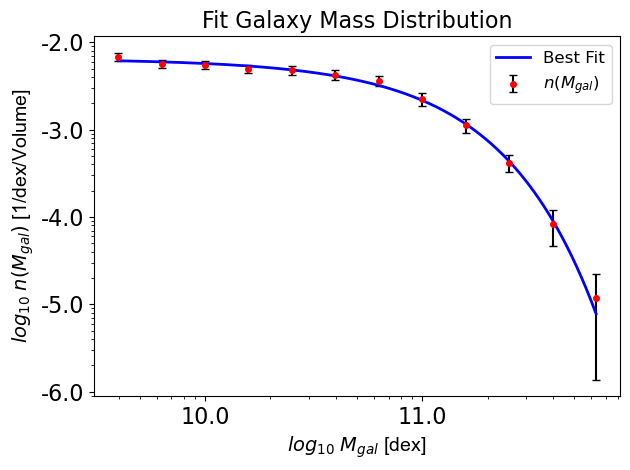

In [108]:
#code to implement the plot of the fit

logMgal_fit = np.linspace(min(logMgal), max(logMgal), 500)
n_fit = Schechter_function(logMgal_fit, phi_star_list[-1], M_star_list[-1], alpha_list[-1])

n_fit1 = Schechter_function(logMgal_fit, -2.5, 10, -1.5)

plt.errorbar(10**logMgal, n, yerr=errorlog, fmt='o', markersize=4, color='red',
             capsize=3, label=r"$n(M_{gal})$", ecolor='black', linestyle='None')

plt.plot(
    10**logMgal_fit, 
    n_fit, 
    color='blue', 
    lw=2, 
    label=r'Best Fit'
)

#plt.plot(10**logMgal_fit, n_fit1, color='orange', lw=2, label='Fit Initial Guess') #uncomment this line if you want to see the fit with the initial guess

# Axis labels and title
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$log_{10}$ $M_{gal}$ [dex]", fontsize=14, fontname="Arial")
plt.ylabel(r"$log_{10}$ $n(M_{gal})$ [1/dex/Volume]", fontsize=14, fontname="Arial")
plt.title("Fit Galaxy Mass Distribution", fontsize=16)

# Custom formatter for axis tick labels
formatter = FuncFormatter(lambda val, _: f"{np.log10(val):.1f}")

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Logarithmic locator for axes
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

# Tick parameters
plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


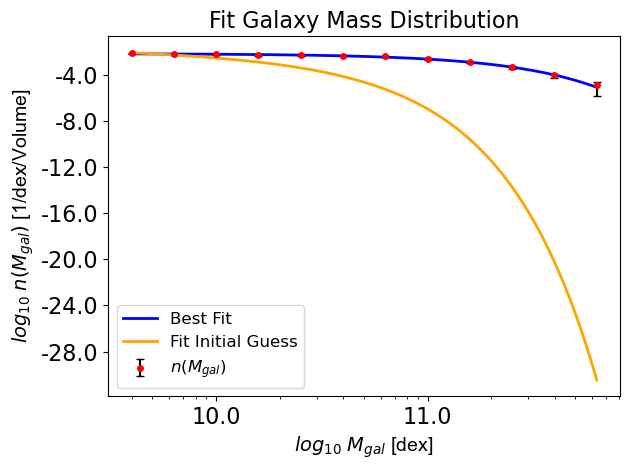

In [109]:
#fit also with initial guess
logMgal_fit = np.linspace(min(logMgal), max(logMgal), 500)
n_fit = Schechter_function(logMgal_fit, phi_star_list[-1], M_star_list[-1], alpha_list[-1])

n_fit1 = Schechter_function(logMgal_fit, -2.5, 10, -1.5)

plt.errorbar(10**logMgal, n, yerr=errorlog, fmt='o', markersize=4, color='red',
             capsize=3, label=r"$n(M_{gal})$", ecolor='black', linestyle='None')

plt.plot(
    10**logMgal_fit, 
    n_fit, 
    color='blue', 
    lw=2, 
    label=r'Best Fit'
)

plt.plot(10**logMgal_fit, n_fit1, color='orange', lw=2, label='Fit Initial Guess') #uncomment this line if you want to see the fit with the initial guess

# Axis labels and title
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$log_{10}$ $M_{gal}$ [dex]", fontsize=14, fontname="Arial")
plt.ylabel(r"$log_{10}$ $n(M_{gal})$ [1/dex/Volume]", fontsize=14, fontname="Arial")
plt.title("Fit Galaxy Mass Distribution", fontsize=16)

# Custom formatter for axis tick labels
formatter = FuncFormatter(lambda val, _: f"{np.log10(val):.1f}")

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Logarithmic locator for axes
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

# Tick parameters
plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


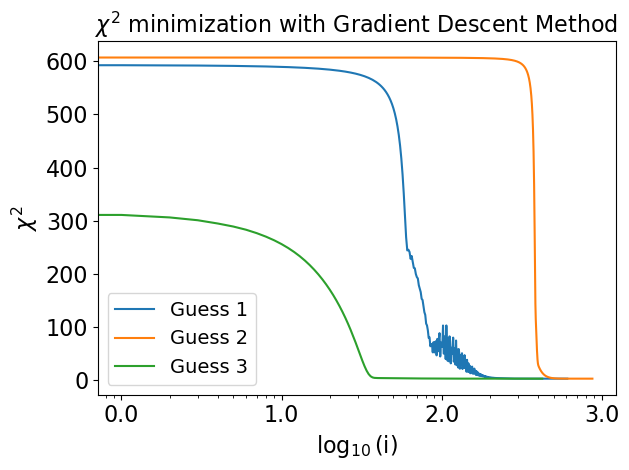

In [110]:
i = np.arange(len(phi_star_list)-2)
i1 = np.arange(len(phi_star_list1)-2)
i2 = np.arange(len(phi_star_list2)-2)

plt.plot(i1, chi_square_list1, label='Guess 1')
plt.plot(i2, chi_square_list2, label='Guess 2')
plt.plot(i, chi_square_list, label='Guess 3')

plt.xscale("log")
#plt.yscale("log")

plt.xlabel(r"$\log_{10} (\text{i})$", fontsize=16)
plt.ylabel(r"$\chi^2$", fontsize=16)

plt.title(r"$\chi^2$ minimization with Gradient Descent Method", fontsize=16)

# Custom formatter for axis tick labels
formatter = FuncFormatter(lambda val, _: f"{np.log10(val):.1f}")

plt.gca().xaxis.set_major_formatter(formatter)
#plt.gca().yaxis.set_major_formatter(formatter)

# Logarithmic locator for axes
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
#plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

# Tick parameters
plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

